<a href="https://colab.research.google.com/github/yadnyesh-24/ANNs/blob/main/Copy_of_ANN_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the codes provided.

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.reshape(-1,1)

        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        for i in range(self.epochs):
            delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            self.weights-= self.lr * dw
            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_predicted


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

Null values:
 No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


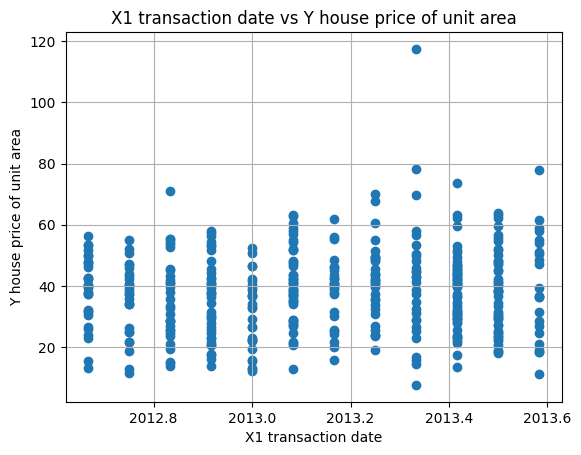

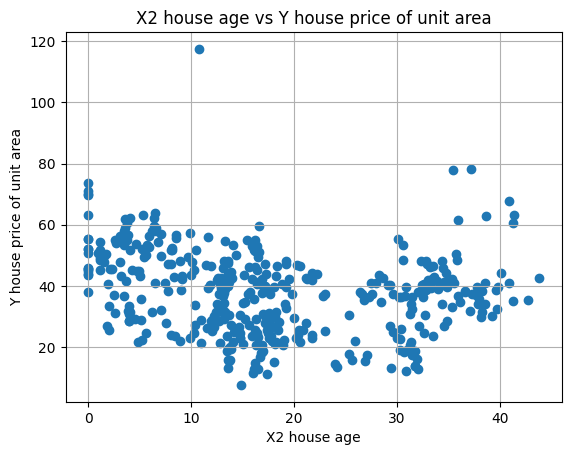

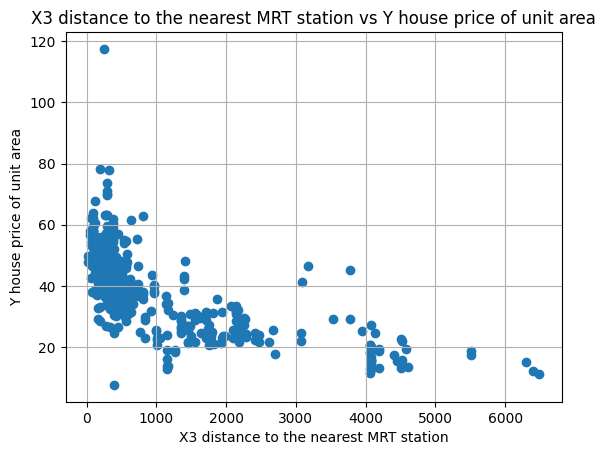

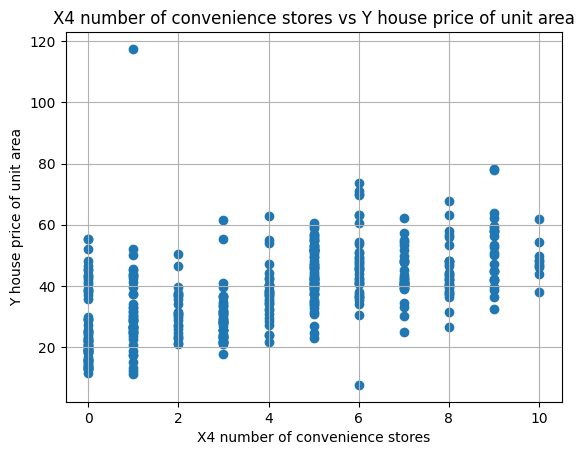

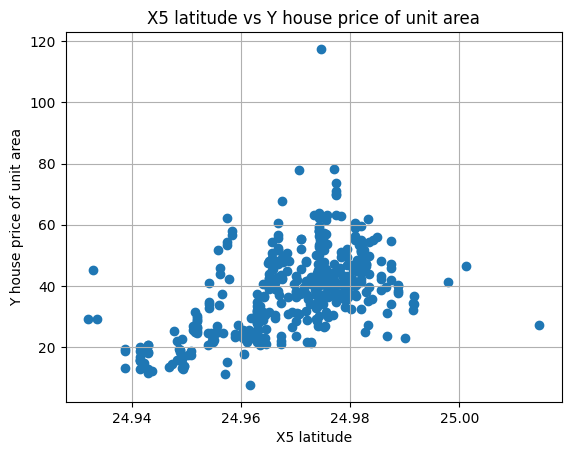

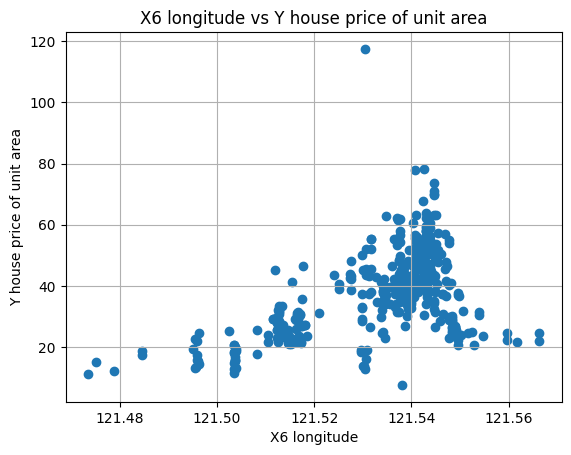

[[  5.36524975]
 [-11.07358746]
 [-19.54019143]
 [ 12.72836159]
 [ 21.10255959]
 [  7.7547896 ]] [[23.76248083]]


Result from my model:
Mean Squared Error: 65.06953911575638
R2 Score: 0.5897736127291738

Sklearn Model Evaluation
MSE: 66.67336271835958
R2 Score: 0.5796624182861772


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

# 1. Read it using pandas.
df = pd.read_csv("Real estate.csv")

#2. Check for null values.
print("Null values:\n", df.isnull().sum())

#3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
features = df.columns[1:-1]
target = df.columns[-1]

for feature in features:
    plt.figure()
    plt.scatter(df[feature], df[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")
    plt.grid(True)
    plt.show()

#4. Remove the unwanted columns.
df = df.drop(columns=[df.columns[0]])

#5 Split the dataset into train and test data. Test data size = 25% of total dataset.
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#6. Normalize the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#7. Fit the training data into the model created in question 1 and predict the testing data.
my_model = LinearRegression(learning_rate=0.1, epochs=1500)
my_model.fit(X_train_scaled, y_train)
y_pred_my_model = my_model.predict(X_test_scaled)

# 8. Use mean square error and R2 from sklearn.metrics as evaluation criterias.
print("")
print("")
print("Result from my model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_my_model))
print("R2 Score:", r2_score(y_test, y_pred_my_model))

# Sklearn model
sk_model = SklearnLinearRegression()
sk_model.fit(X_train_scaled, y_train)
y_pred_sklearn = sk_model.predict(X_test_scaled)

print("\nSklearn Model Evaluation")
print("MSE:", mean_squared_error(y_test, y_pred_sklearn))
print("R2 Score:", r2_score(y_test, y_pred_sklearn))


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1.Load the dataset from sklearn.datasets
data = load_breast_cancer()

# 2.Separate out the X and Y columns.
X = data.data
y = data.target

# 3.Normalize the X data using MinMaxScaler or StandardScaler.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.Create a train-test-split. Take any suitable test size.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




```
# This is formatted as code
```

5. Write code for the sigmoid function and Logistic regression.


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return (y_pred > 0.5).astype(int)


6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogReg
from sklearn.metrics import accuracy_score

#6. Fit your model on the dataset and make predictions.
custom_model = LogisticRegression(learning_rate=0.1, epochs=1000)
custom_model.fit(X_train, y_train)
y_pred_custom = custom_model.predict(X_test)
acc_custom = accuracy_score(y_test, y_pred_custom)
print(f"Custom Logistic Regression Accuracy: {acc_custom:.4f}")

#7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
penalties = [None, 'l1', 'l2', 'elasticnet']
for penalty in penalties:
    if penalty == None:
        # No penalty
        model = SklearnLogReg(penalty=None, solver='lbfgs', max_iter=1000)
    elif penalty == 'l1':
        # l1 requires solvers like 'liblinear' or 'saga'
        model = SklearnLogReg(penalty='l1', solver='liblinear', max_iter=1000)
    elif penalty == 'l2':
        # l2 works with lbfgs
        model = SklearnLogReg(penalty='l2', solver='lbfgs', max_iter=1000)
    else:
        # elasticnet works only with saga solver and requires l1_ratio
        model = SklearnLogReg(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)

    model.fit(X_train, y_train)
    y_pred_sklearn = model.predict(X_test)
    acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
    print(f"Sklearn LogisticRegression (penalty='{penalty}') Accuracy: {acc_sklearn:.4f}")



Custom Logistic Regression Accuracy: 0.9825
Sklearn LogisticRegression (penalty='None') Accuracy: 0.9386
Sklearn LogisticRegression (penalty='l1') Accuracy: 0.9737
Sklearn LogisticRegression (penalty='l2') Accuracy: 0.9737
Sklearn LogisticRegression (penalty='elasticnet') Accuracy: 0.9737


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report and confusion matrix for the best custom model
print("\nCustom Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_custom))

print("Custom Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

# Print classification report and confusion matrix for sklearn model
print("\nSklearn Logistic Regression (penalty='l2') Classification Report:")
print(classification_report(y_test, y_pred_sklearn))

print("Sklearn Logistic Regression (penalty='l2') Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sklearn))


Custom Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Custom Logistic Regression Confusion Matrix:
[[42  1]
 [ 1 70]]

Sklearn Logistic Regression (penalty='l2') Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Sklearn Logistic Regression (penalty='l2') Confusion Matrix:
[[41  2]
 [ 1 70]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [ ]:
#1. Load the data as you did in the 2nd question.
df = pd.read_csv("glass.csv")

# 2. Extract the X and Y columns
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 3. Split it into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [ ]:
import numpy as np
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        y_pred = []
        for test_point in X_test:
            distances = [euclidean_distance(test_point, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            values, counts = np.unique(k_nearest_labels, return_counts=True)
            majority_label = values[np.argmax(counts)]
            y_pred.append(majority_label)
        return np.array(y_pred)


# 6. Fit the model on the training data.
knn_model = KNN(k=5) # Choose a suitable k value
knn_model.fit(X_train, y_train)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [ ]:
from sklearn.metrics import accuracy_score

for k in [1, 3, 5, 7, 9]:
    knn_model = KNN(k=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"KNN custom implementation with k={k} Accuracy: {acc:.4f}")


KNN custom implementation with k=1 Accuracy: 0.9386
KNN custom implementation with k=3 Accuracy: 0.9474
KNN custom implementation with k=5 Accuracy: 0.9474
KNN custom implementation with k=7 Accuracy: 0.9474
KNN custom implementation with k=9 Accuracy: 0.9649


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for k in [1, 3, 5, 7, 9]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred_sklearn = clf.predict(X_test)
    acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
    print(f"Sklearn KNeighborsClassifier with k={k} Accuracy: {acc_sklearn:.4f}")


Sklearn KNeighborsClassifier with k=1 Accuracy: 0.9386
Sklearn KNeighborsClassifier with k=3 Accuracy: 0.9474
Sklearn KNeighborsClassifier with k=5 Accuracy: 0.9474
Sklearn KNeighborsClassifier with k=7 Accuracy: 0.9474
Sklearn KNeighborsClassifier with k=9 Accuracy: 0.9649
